In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
months = [f"{x:02d}" for x in range(9,10)]
years = [f"{x:04d}" for x in range(21,331)]
i =0
result = np.zeros((310,62))

In [3]:
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.PD.nc')
        plotvar = data.variables['PD'][0,:,:]
        lont = data.variables['TLONG']
        latt = data.variables['TLAT']
        #lont = lont[250:344,1100:1300]
        #latt = latt[250:344,1100:1300]
        plotvar = plotvar[:,200:400,700:1000]
        plotvar[plotvar == -1.0] = np.nan
        aveplot = np.nanmean(plotvar,axis=1)
        aveplot = np.nanmean(aveplot,axis=1)
        #aveplot = plotvar.mean(axis=1)
        #aveplot = aveplot.mean(axis=1)
        result[i] = aveplot
        
        i = i + 1
#********************************************************************

In [4]:
result = (result-1)*1000*1000

In [5]:
result = result/1000

In [12]:
result.shape

(310, 62)

In [13]:
np.save(file="PD150-330.npy", arr=result)

In [7]:
data1=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/depth.nc')
C = data1.variables['z_t'][:]/100
B = C[:60]

In [8]:
A = np.arange(540)
#B = np.arange(50)
xx, yy = np.meshgrid(B, A)

In [9]:
nice_cmap=sns.diverging_palette(245, 15, n=13,as_cmap=True)
#nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
lev_cmap = nice_cmap([1,10,30,50,70,90,100,110,120,130,140,150,160,170,180,190,200,210,230,240]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
my_font = {'fontname':'Cambria', 'size':'17'}

nice_levels = [27.7865,27.7875,27.7885,27.7895,27.7905,27.7915,27.7925,27.7935,27.7945,27.7955,27.7965,27.7975,\
               27.7985,27.7995,27.8005,27.8015,27.8025,27.8035,27.8045,27.8055,27.8065]

In [10]:
data1 = np.loadtxt("weddle.out")
data2 = np.loadtxt("mix.out")

TypeError: Shape of x does not match that of z: found (540, 60) instead of (310, 60).

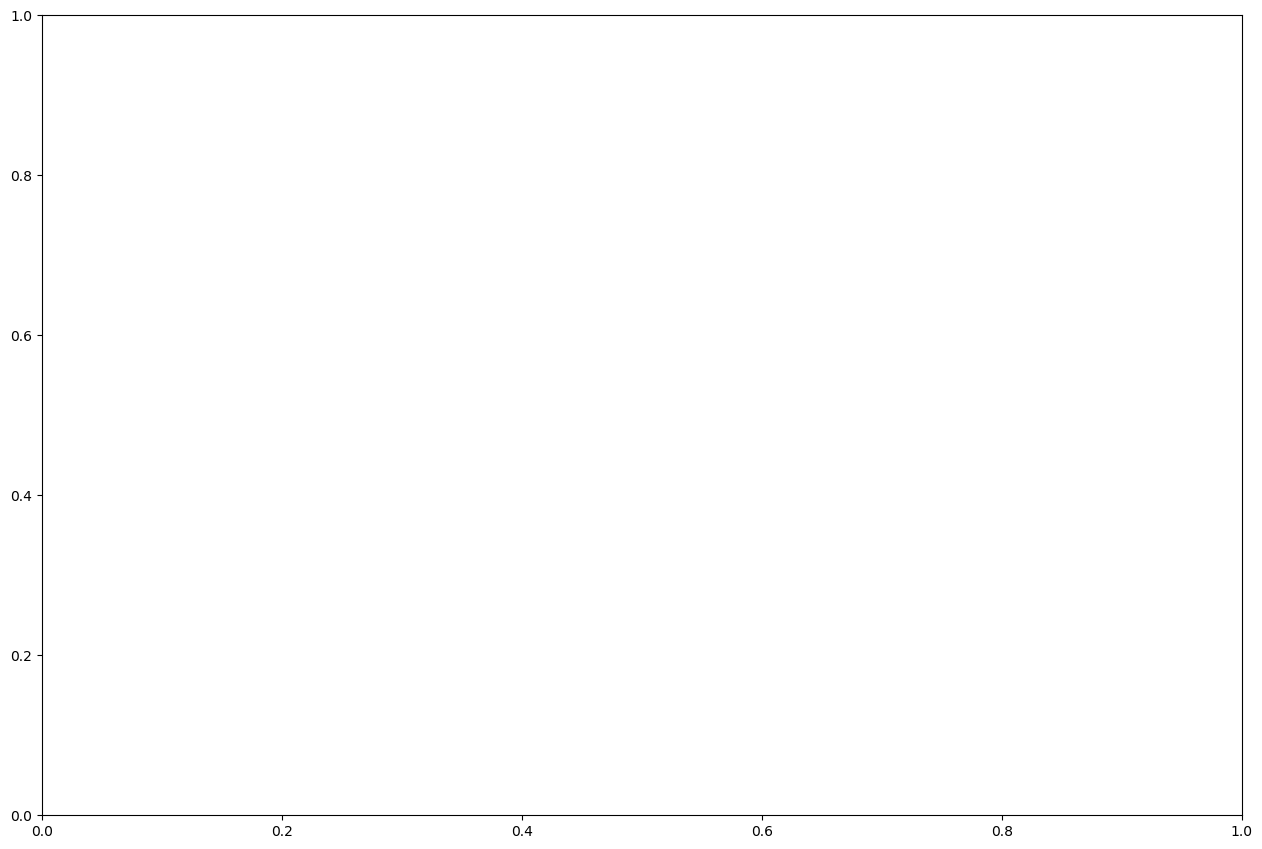

In [11]:
t = np.arange(0,540,3)
# plot the result
fig = plt.figure(figsize=(15, 10), dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
#ax0 = plt.subplot(2,1,1)
im = ax0.contourf(yy, xx, result[:,:60],levels = nice_levels,spacing = 'uniform',cmap=nice_cmap,interpolation='none',extend='both')
im.cmap.set_over('firebrick')
im.cmap.set_under('darkblue')
#CS = ax0.contour(yy,xx,result, [0.8],colors = 'r', linestyles = 'solid',linewidths=1)
#plt.clabel(CS, inline=0.1, fontsize=10)
cbar = fig.colorbar(im, ax=ax0, ticks=nice_levels,extendfrac='auto')
cbar.ax.tick_params(labelsize=15)
#cbar.minorticks_on()
cbar.set_label('(kg/$m^3$)', **my_font)
ax0.set_title('Mixed Layer Depth')
#############################################################################
##设定X坐标值
plt.xticks(range(0,541,60), ['150', '170', '190', '210', '230','250', '270', '290', '310', '330'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Year',**my_font)
plt.ylabel('Depth (m)',**my_font)
plt.gca().invert_yaxis()
ax0.set_title('Salinity (61.3$^\circ$S - 70$^\circ$S, 40$^\circ$W - 10$^\circ$W, averaged)',**my_font)
##################################
ax2 = ax0.twinx()
ax2.plot(data1,'green',linewidth=2)
ax0.plot(data2,'yellow',linewidth=2)
ax2.set(ylim=(-800, 100),xlim=(0, 539))
plt.yticks(range(-800,101,100), ['', '', '', '', '','','','','0%','100%'])
#plt.hlines(0, 0, 240, colors = "blue",linestyles = "dashed")
####################################################################
plt.savefig("PD-depthnew.png",bbox_inches='tight',dpi=fig.dpi)

In [ ]:
result = (result-1)*1000

In [ ]:
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(18,10), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(result[:,10],'r-o',linewidth=3)

#########################################

plt.xticks(range(0,310,50), ['21','71','121','171', '221', '271','321'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('(kg/$m^3$)',color= 'red',**my_font)
#plt.hlines(mean, 0, 2160, colors = "k",linestyles = "dashed",linewidth=4)
plt.axis("tight")
#plt.plot([0,-ww2[0]],[320,2300])
ax0.set_title('Potential Density Model Drift at 100m   (61.3$^\circ$S - 70$^\circ$S, 40$^\circ$W - 10$^\circ$W, averaged)',**my_font)
plt.savefig("PD100.png",bbox_inches='tight',dpi=fig.dpi)